<a href="https://colab.research.google.com/github/akhilesh0090/Human-Activity-Recognition-using-Smartphone-Data/blob/main/Human_Activity_Recognition_using_Smartphone_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
train = pd.read_csv('/content/test.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 4.3+ MB


In [ ]:
test.subject.value_counts()

subject
4     317
2     302
9     288
10     92
Name: count, dtype: int64

# Data Wrangling

## Checking of duplicates

In [ ]:
sum(train.duplicated())
sum(test.duplicated())

0

## Checking for missing values

In [ ]:
train.isna().values.sum()
test.isna().values.sum()

0

## Checking for class imbalance

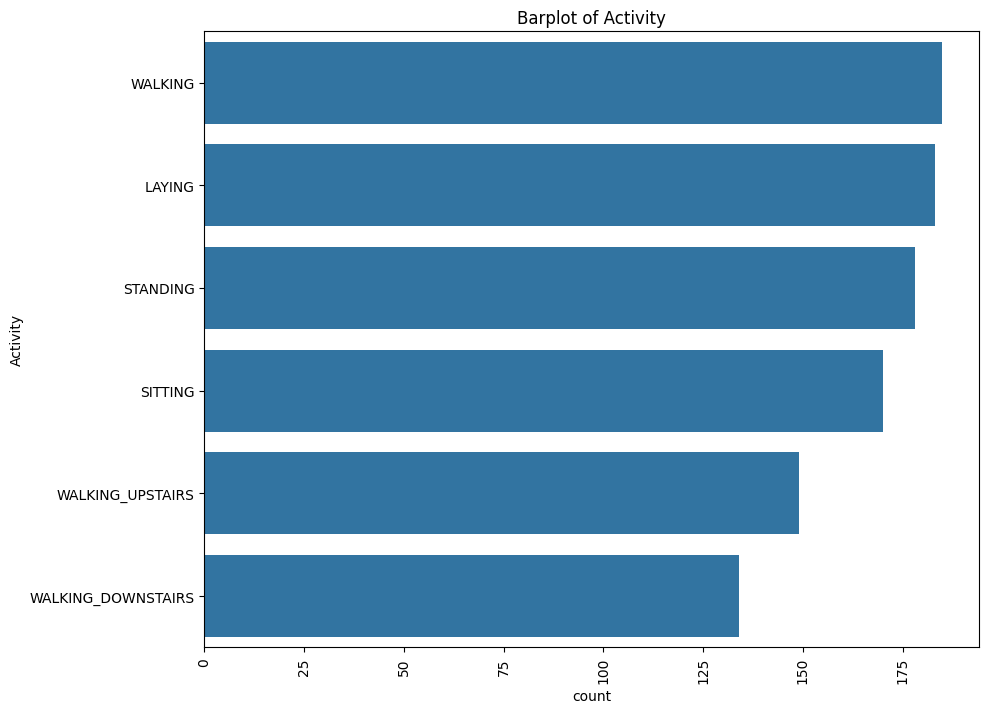

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Barplot of Activity')
sns.countplot(train.Activity, order= train.Activity.value_counts().index)
plt.xticks(rotation = 90)
plt.show()

there is no imbalance in class as range of instances between 1200 to 1700

# Exploratory Data Analysis

In [ ]:
pd.DataFrame.from_dict(Counter([c.split('-')[0].split('(')[0] for c in train.columns]),
                       orient="index").rename(columns={0:'count'}).sort_values('count',ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


###Analysing tBodyAccMag-mean feature

Let's consider tBodyAccMag-mean() feature to differentiate among these two broader set of activities.

If we try to build a simple classification model to classify the activity using one variable at a time then probability density function(PDF) is very helpful to assess importance of a continuous variable

Based on the common nature of activities we can broadly put them in two categories.

**Static and dynamic activities : **

SITTING, STANDING, LAYING can be considered as static activities with no motion involved

WALKING, WALKING_DOWNSTAIRS, WALKING_UPSTAIRS can be considered as dynamic activities with significant amount of motion involved

Text(0.2, 9, 'Dynamic Activities')

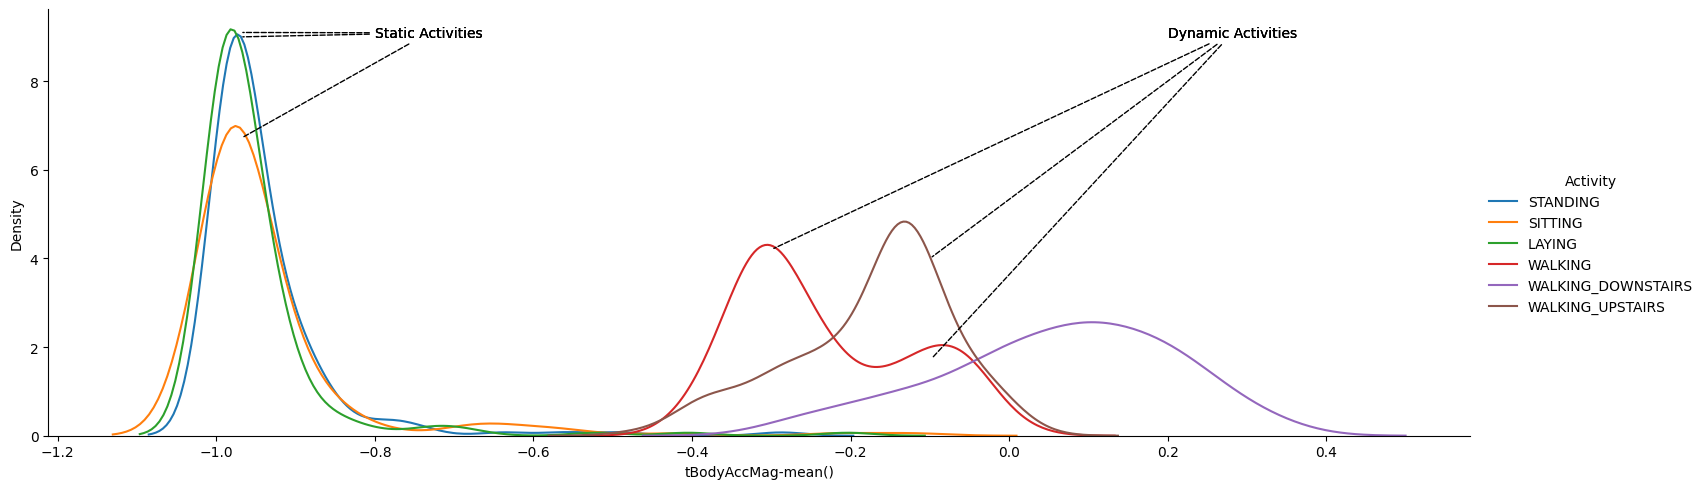

In [ ]:
f=sns.FacetGrid(train,hue='Activity', height=5, aspect=3)
f.map(sns.distplot, 'tBodyAccMag-mean()', hist=False).add_legend()
plt.annotate("Static Activities", xy=(-.97,6.7),xytext=(-.8,9),arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate("Static Activities", xy=(-.97,9),xytext=(-.8,9),arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate("Static Activities", xy=(-.97,9.1),xytext=(-.8,9),arrowprops={'arrowstyle':'-','ls':'dashed'})

plt.annotate("Dynamic Activities", xy=(-.3,4.2),xytext=(.2,9),arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate("Dynamic Activities", xy=(-.1,4),xytext=(.2,9),arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate("Dynamic Activities", xy=(-.1,1.7),xytext=(.2,9),arrowprops={'arrowstyle':'-','ls':'dashed'})

####Using the above density plot we can easily come with a condition to seperate static activities from dynamic activities.
if(tBodyAccMag-mean()<=-0.5): Activity = "static"

else:Activity = "dynamic"

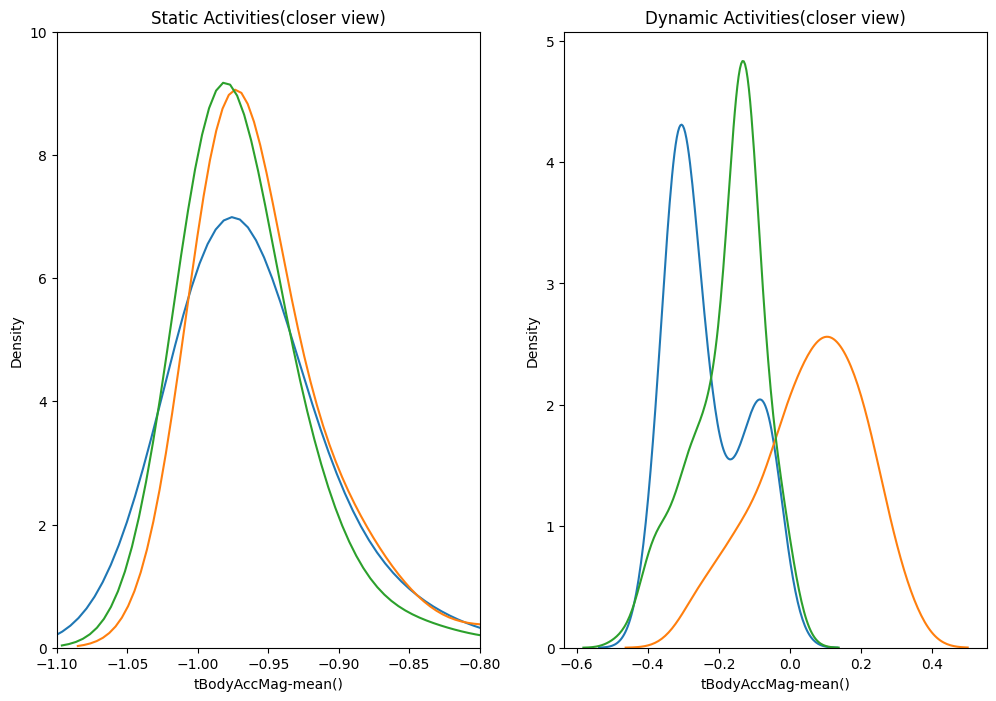

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static Activities(closer view)")
sns.distplot(train[train["Activity"]=="SITTING"]['tBodyAccMag-mean()'],hist = False, label = 'Sitting')
sns.distplot(train[train["Activity"]=="STANDING"]['tBodyAccMag-mean()'],hist = False,label = 'Standing')
sns.distplot(train[train["Activity"]=="LAYING"]['tBodyAccMag-mean()'],hist = False, label = 'Laying')
plt.axis([-1.1, -0.8, 0, 10])

plt.subplot(1,2,2)
plt.title("Dynamic Activities(closer view)")
sns.distplot(train[train["Activity"]=="WALKING"]['tBodyAccMag-mean()'],hist = False, label = 'WALKING')
sns.distplot(train[train["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMag-mean()'],hist = False,label = 'WALKING_DOWNSTAIRS')
sns.distplot(train[train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMag-mean()'],hist = False, label = 'WALKING_UPSTAIRS')
plt.show()

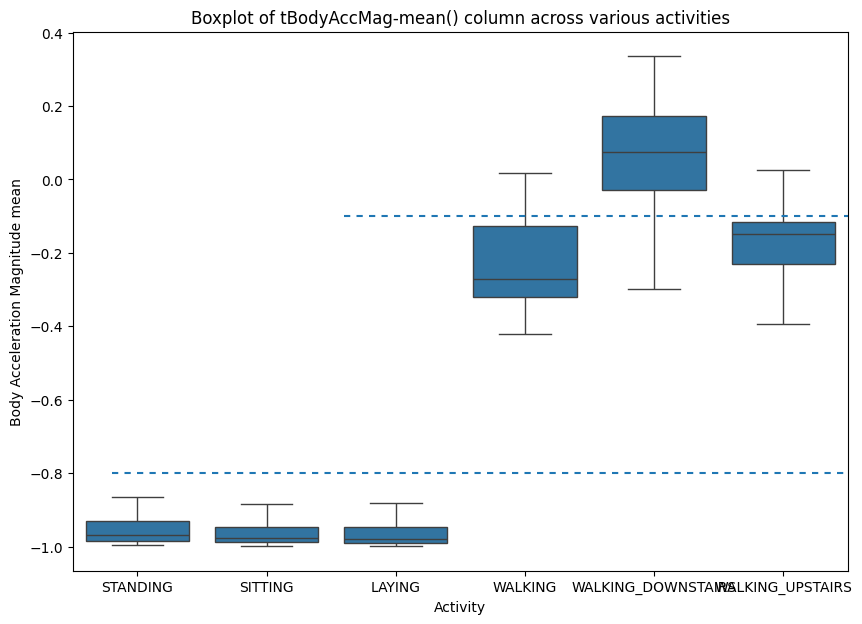

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(x = "Activity", y="tBodyAccMag-mean()", data = train, showfliers = False)
plt.ylabel('Body Acceleration Magnitude mean')
plt.title("Boxplot of tBodyAccMag-mean() column across various activities")
plt.axhline(y = -0.8, xmin = 0.05, dashes = (3,3))
plt.axhline(y= -0.1, xmin = 0.35, dashes=(3,3))
plt.show()


Using boxplot again we can come with conditions to seperate static activities from dynamic activities.
```
#
if(tBodyAccMag-mean()<=-0.8):
    Activity = "static"
if(tBodyAccMag-mean()>=-0.6):
    Activity = "dynamic"
```
Also, we can easily seperate WALKING_DOWNSTAIRS activity from others using boxplot.
```
#
if(tBodyAccMag-mean()>-0.1):
    Activity = "WALKING_DOWNSTAIRS"
else:
    Activity = "others"
```

### Analysing Angle between X-axis and gravityMean feature

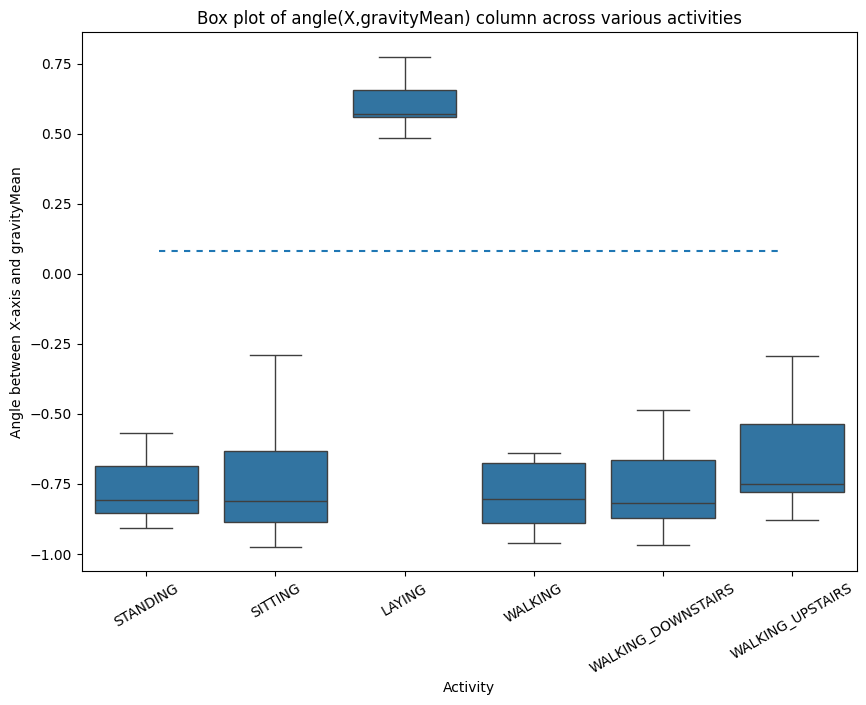

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train, showfliers=False)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,dashes=(3,3))
plt.ylabel("Angle between X-axis and gravityMean")
plt.title('Box plot of angle(X,gravityMean) column across various activities')
plt.xticks(rotation = 30)
plt.show()

From the boxplot we can observe that angle(X,gravityMean) perfectly seperates LAYING from other activities.
```
#
if(angle(X,gravityMean)>0.01):
    Activity = "LAYING"
else:
    Activity = "others"
```




### Analysing Angle between Y-axis and gravityMean feature

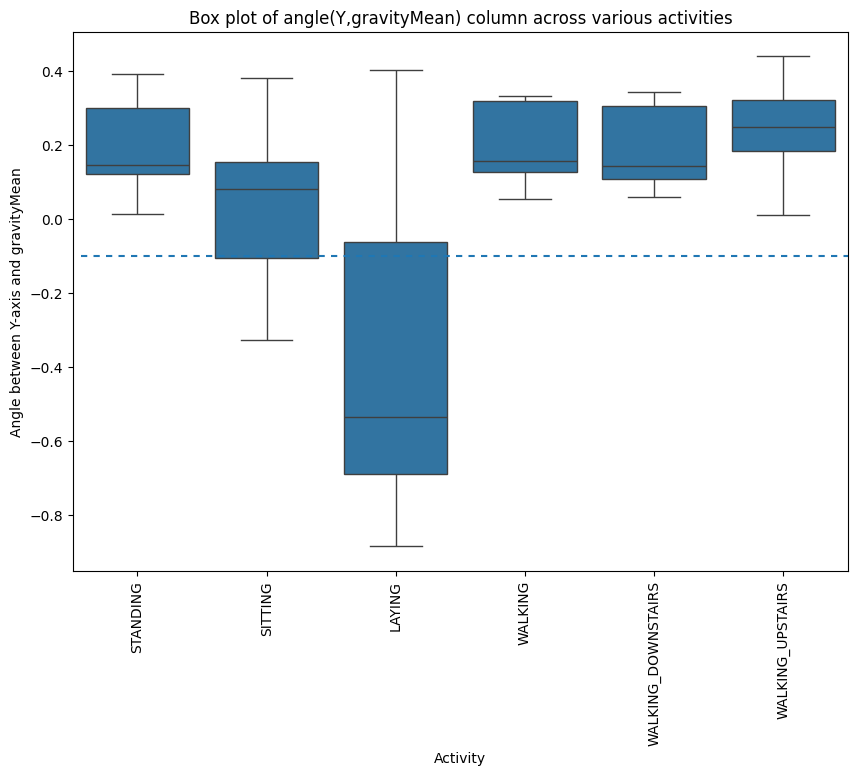

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(Y,gravityMean)', data = train, showfliers=False)
plt.ylabel("Angle between Y-axis and gravityMean")
plt.title('Box plot of angle(Y,gravityMean) column across various activities')
plt.xticks(rotation = 90)
plt.axhline(y=-0.1, xmin=0.01, dashes=(3,3))
plt.show()

## Visualizing data using PCA

In [ ]:
x_for_pca = train.drop(['subject', 'Activity'], axis = 1)
pca = PCA(n_components=2, random_state=0).fit_transform(x_for_pca)

In [ ]:
pca

array([[-2.63288715, -1.34836004],
       [-4.32066522, -1.05337303],
       [-5.0258872 , -0.5125469 ],
       ...,
       [ 5.92507373,  0.78568352],
       [ 6.76131923,  1.41451319],
       [ 6.94801212,  1.61092632]])

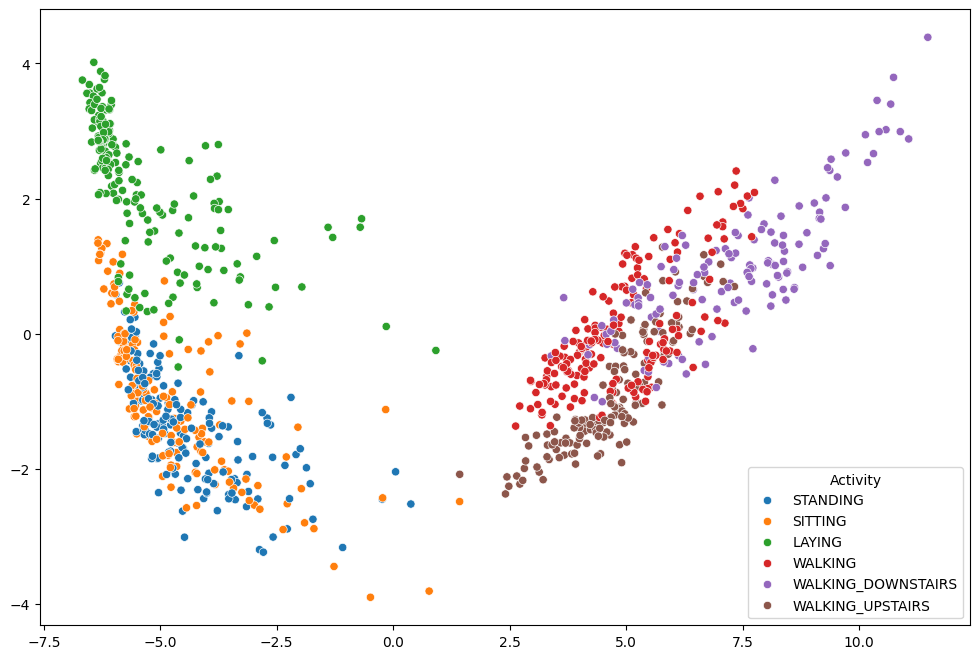

In [ ]:
 plt.figure(figsize=(12,8))
sns.scatterplot(x = pca[:, 0], y = pca[:, 1], hue = train['Activity'])
plt.show()

### Visualizing data using t-SNE

In [ ]:
x_for_tsne = train.drop(['subject', 'Activity'], axis = 1)
tsne = TSNE(n_components=2, random_state=0, n_iter=1000).fit_transform(x_for_tsne)

In [ ]:
tsne

array([[ -8.759938 ,  -1.4139047],
       [-18.231812 , -12.221746 ],
       [-28.514662 , -23.981174 ],
       ...,
       [ 39.653877 ,  25.785696 ],
       [ 39.011353 ,  25.812607 ],
       [ 38.310577 ,  25.316748 ]], dtype=float32)

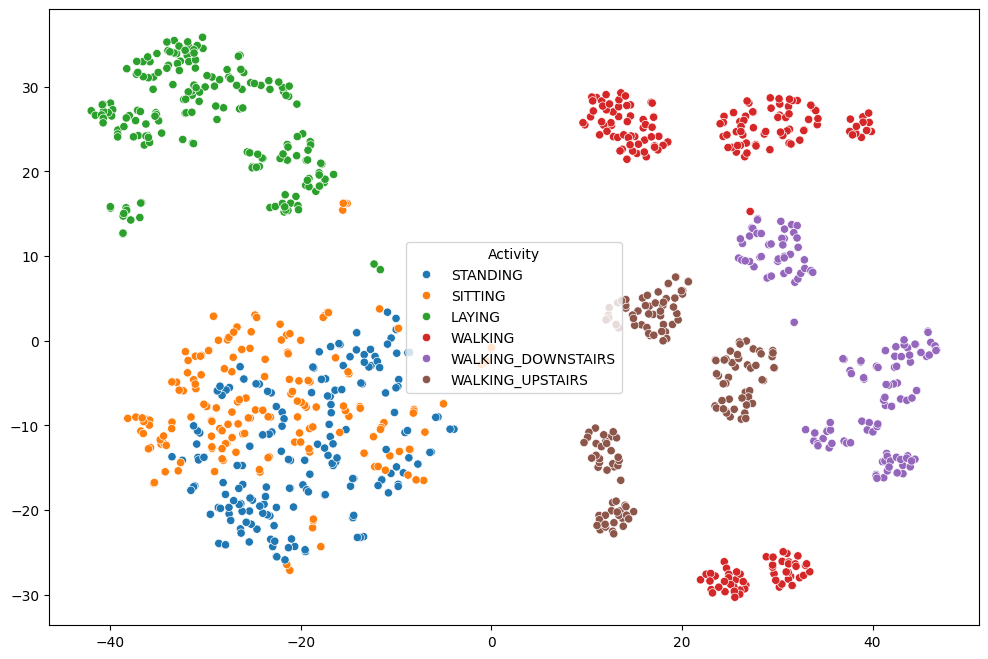

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = tsne[:, 0], y = tsne[:, 1], hue = train['Activity'])
plt.show()

## ML models

### Getting training and test data ready

In [ ]:
X_train = train.drop(['subject', 'Activity'], axis = 1)
y_train = train.Activity

X_test = test.drop(['subject', 'Activity'], axis = 1)
y_test = test.Activity

In [ ]:
print('Training data size : ', X_train.shape)
print('Test data size : ', X_test.shape)

Training data size :  (999, 561)
Test data size :  (999, 561)


### Logistic regression model with Hyperparameter tuning and cross validation

In [ ]:
parameters = {'max_iter': [100, 200, 500]}
lr_classifier = LogisticRegression()
lr_classifier_rs = RandomizedSearchCV(lr_classifier, param_distributions= parameters, cv = 5, random_state=42)
lr_classifier_rs.fit(X_train, y_train)
y_pred_lr = lr_classifier_rs.predict(X_test)

In [ ]:
lr_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_lr)
print("Accuracy using Logistic Regression : ", lr_accuracy)

Accuracy using Logistic Regression :  0.998998998998999


In [ ]:
# function to plot confusion matrix
def plot_confusion_matrix(cm,labels):
    fig, ax = plt.subplots(figsize=(12,8)) # for plotting confusion matrix as image
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=labels, yticklabels=labels,
    ylabel='True label',
    xlabel='Predicted label')
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

In [ ]:
cm = confusion_matrix(y_test.values,y_pred_lr)
cm

array([[183,   0,   0,   0,   0,   0],
       [  0, 170,   0,   0,   0,   0],
       [  0,   1, 177,   0,   0,   0],
       [  0,   0,   0, 185,   0,   0],
       [  0,   0,   0,   0, 134,   0],
       [  0,   0,   0,   0,   0, 149]])

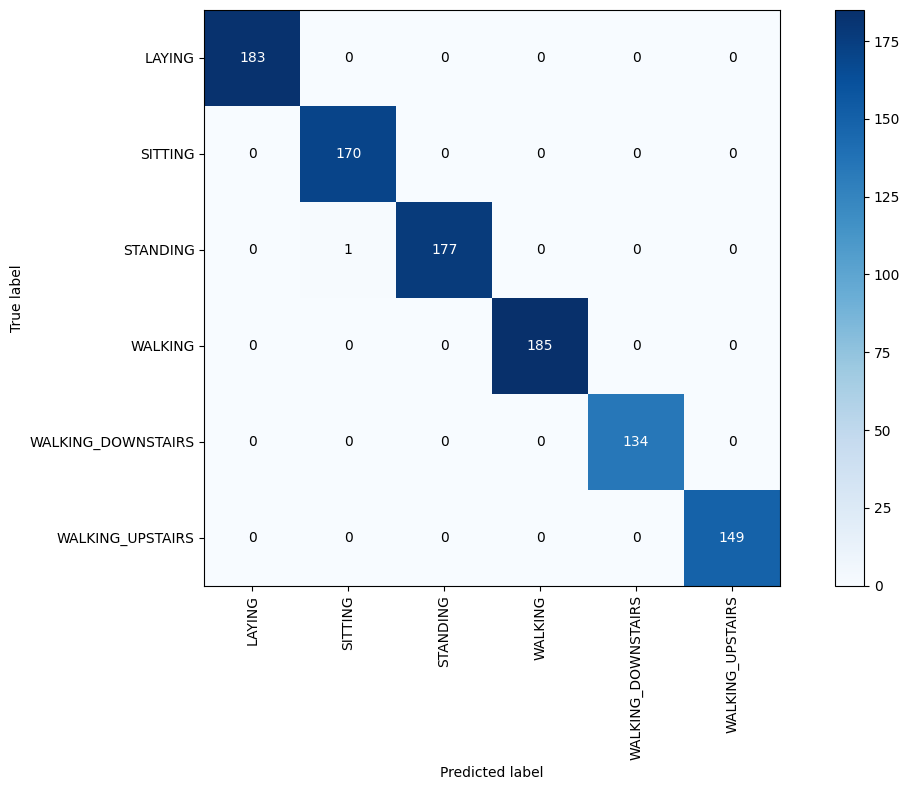

In [ ]:
cm = confusion_matrix(y_test.values,y_pred_lr)
plot_confusion_matrix(cm, np.unique(y_pred_lr))

In [ ]:
#function to get best random search attributes
def get_best_randomsearch_results(model):
    print("Best estimator : ", model.best_estimator_)
    print("Best set of parameters : ", model.best_params_)
    #print("Best score : ", model.best_score_)

In [ ]:
  # getting best random search attributes
  get_best_randomsearch_results(lr_classifier_rs)

Best estimator :  LogisticRegression(max_iter=200)
Best set of parameters :  {'max_iter': 200}


### Kernel SVM model with Hyperparameter tuning and cross validation

In [ ]:
parameters = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [100, 50]
}

svm_rs = RandomizedSearchCV(SVC(), param_distributions=parameters, cv = 3, random_state=42)
svm_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [100, 50],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=42)

In [ ]:
y_pred = svm_rs.predict(X_test)

In [ ]:
kernel_svm_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Kernel SVM : ", kernel_svm_accuracy)

Accuracy using Kernel SVM :  1.0


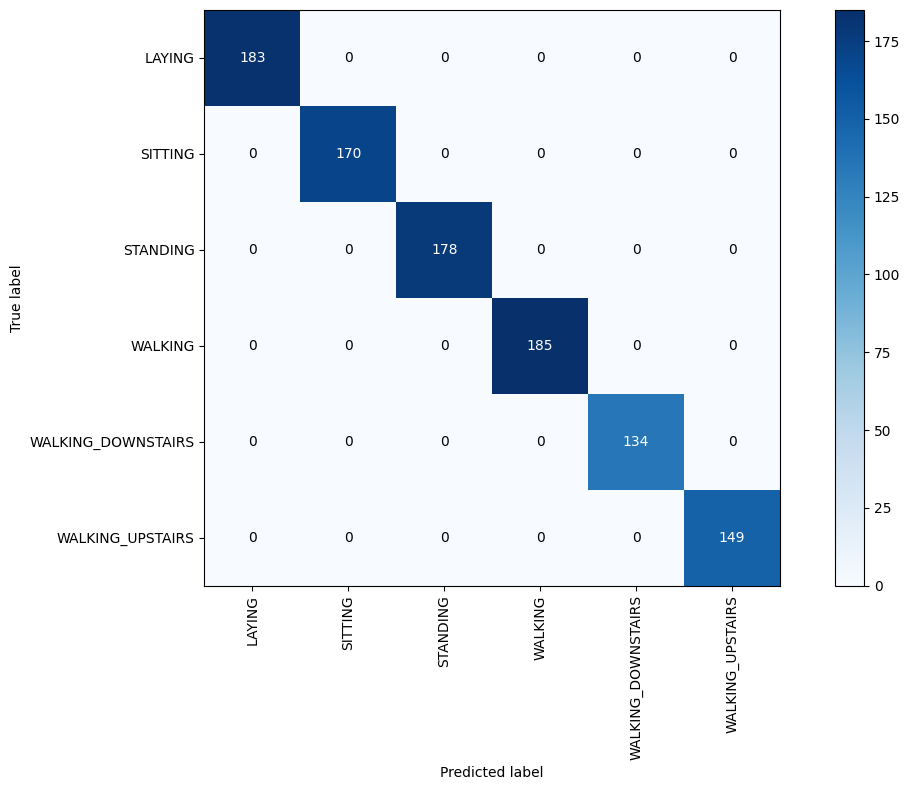

In [ ]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

In [ ]:
get_best_randomsearch_results(svm_rs)

Best estimator :  SVC(C=100)
Best set of parameters :  {'kernel': 'rbf', 'C': 100}


### Decision tree model with Hyperparameter tuning and cross validation

In [ ]:
parameters = {'max_depth': np.arange(2, 10, 2)}

dt_classifier = DecisionTreeClassifier()
dt_classifier_rs = RandomizedSearchCV(dt_classifier, param_distributions = parameters, random_state = 42)
dt_classifier_rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([2, 4, 6, 8])},
                   random_state=42)

In [ ]:

y_pred = dt_classifier_rs.predict(X_test)

In [ ]:
dt_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Decision tree : ", dt_accuracy)

Accuracy using Decision tree :  1.0


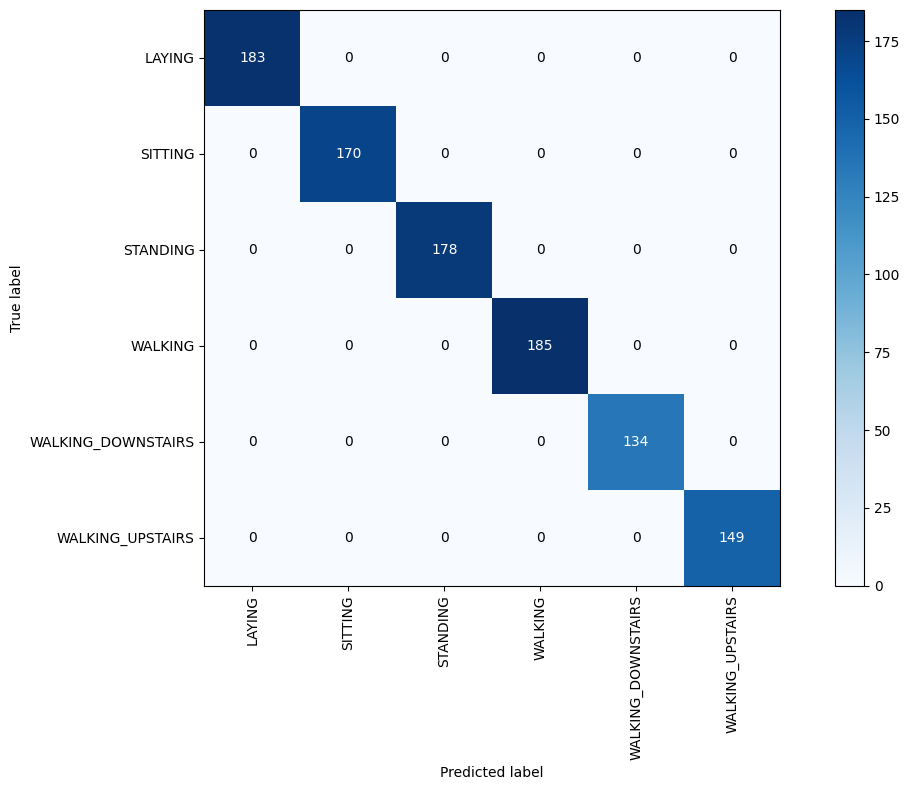

In [ ]:

cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred)) # plotting confusion matrix

In [ ]:
# getting best random search attributes
get_best_randomsearch_results(dt_classifier_rs)

Best estimator :  DecisionTreeClassifier(max_depth=8)
Best set of parameters :  {'max_depth': 8}


###  Random forest model with Hyperparameter tuning and cross validation

In [ ]:
parameters = {
    'n_estimators':np.arange(20, 101, 10),
    'max_depth': np.arange(2, 17, 2)
}
rf_classifier = RandomForestClassifier()
rf_classifier_rs = RandomizedSearchCV(rf_classifier, param_distributions=parameters,random_state = 42)
rf_classifier_rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16]),
                                        'n_estimators': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   random_state=42)

In [ ]:
# getting best random search attributes
get_best_randomsearch_results(rf_classifier_rs)

Best estimator :  RandomForestClassifier(max_depth=12, n_estimators=70)
Best set of parameters :  {'n_estimators': 70, 'max_depth': 12}


In [ ]:

y_pred = rf_classifier_rs.predict(X_test)

In [ ]:
rf_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Random forest : ", rf_accuracy)

Accuracy using Random forest :  1.0


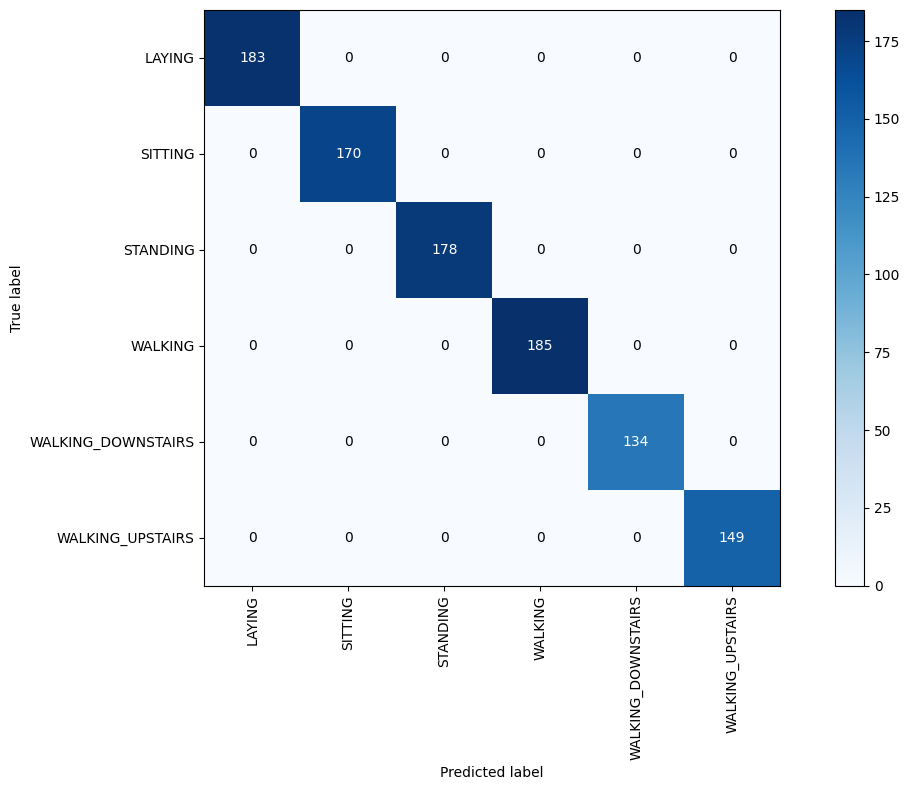

In [ ]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))